# NLP Project

## Project Goals
* Webscrape 682 top starred repositories on GitHub and clean the data.
* Explore to find features that indicate a specific programming language.
* Based on the findings predict the main programming language of an out-of-sample repository.

# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
import re

from importlib import reload

import acquire as a
import prepare as p
import explore as e
import model as m

# Acquire

* Data acquired from GitHub starred repos README files

# Prepare

**Prepare Actions:**
* Determine the top five languages and lump all others as "Other" (NULLs have been kept and listed as "Not Listed")
* README content prep:
    * Normalize language (remove any non-ASCII characters aka. other languages)
    * Remove all punctuation
    * Make all lowercase
    * Determine stopwords by looking words that appear evenly across all languages and remove them
* Split data into train, validate and test (approx. 60/25/15), stratifying on 'language'
* Scaled continuous variable

## Data dictionary
| Feature | Definition | Type |
|:--------|:-----------|:-------
|**repo**| Name of the repository on GitHub| *string*|
|**word_freq**| Number of times a word appears across all README| *float*|
|**lemmatized_len**| Number of characters in| *int*|
|**username**| Username of GitHub user| *string*|
|**Target variable**
|**language**| Primary programming language used in the repository | *string* |


In [2]:
# acquiring data
df = a.acquire_readmes()

# prepping data
df = p.prep_df_for_nlp(df,'readme_contents')

# splitting data into train, validate, and test
train, validate, test = p.split_data(df, 'language')

In [3]:
df.head()

,repo,language,readme_contents,clean,stem,lemmatized,username,lemmatized_len
0,terminal,Other,![terminal-logos](https://user-images.githubus...,terminallogos welcome windows terminal console...,terminallogo welcom window termin consol comma...,terminallogos welcome window terminal console ...,microsoft,8152
1,PowerToys,Other,# Microsoft PowerToys\n\n![Hero image for Micr...,microsoft powertoys hero microsoft powertoys u...,microsoft powertoy hero microsoft powertoy use...,microsoft powertoys hero microsoft powertoys u...,microsoft,6486
2,transformers,Python,<!---\nCopyright 2020 The HuggingFace Team. Al...,copyright 2020 huggingface team rights reserve...,copyright 2020 huggingfac team right reserv li...,copyright 2020 huggingface team right reserved...,huggingface,37200
3,rust,Other,# The Rust Programming Language\n\nThis is the...,rust programming language main source code rep...,rust program languag main sourc code repositor...,rust programming language main source code rep...,rust-lang,5587
4,every programmer should know,Not Listed,> *[Join our community](https://metadevelopmen...,join community professional software developer...,join commun profession softwar develop get con...,join community professional software developer...,mtdvio,6397


## A brief look at the data

In [4]:
# show the first 5 rows of the data
train.language.value_counts()

Other         184
JavaScript    121
Not Listed     54
Python         54
TypeScript     50
Go             47
Java           42
Name: language, dtype: int64

In [5]:
# show the first 5 rows of the data
train.language.value_counts(normalize=True)

Other         0.333333
JavaScript    0.219203
Not Listed    0.097826
Python        0.097826
TypeScript    0.090580
Go            0.085145
Java          0.076087
Name: language, dtype: float64

In [6]:
validate.language.value_counts(normalize=True)

Other         0.335294
JavaScript    0.217647
Not Listed    0.100000
Python        0.094118
TypeScript    0.094118
Go            0.082353
Java          0.076471
Name: language, dtype: float64

# Explore

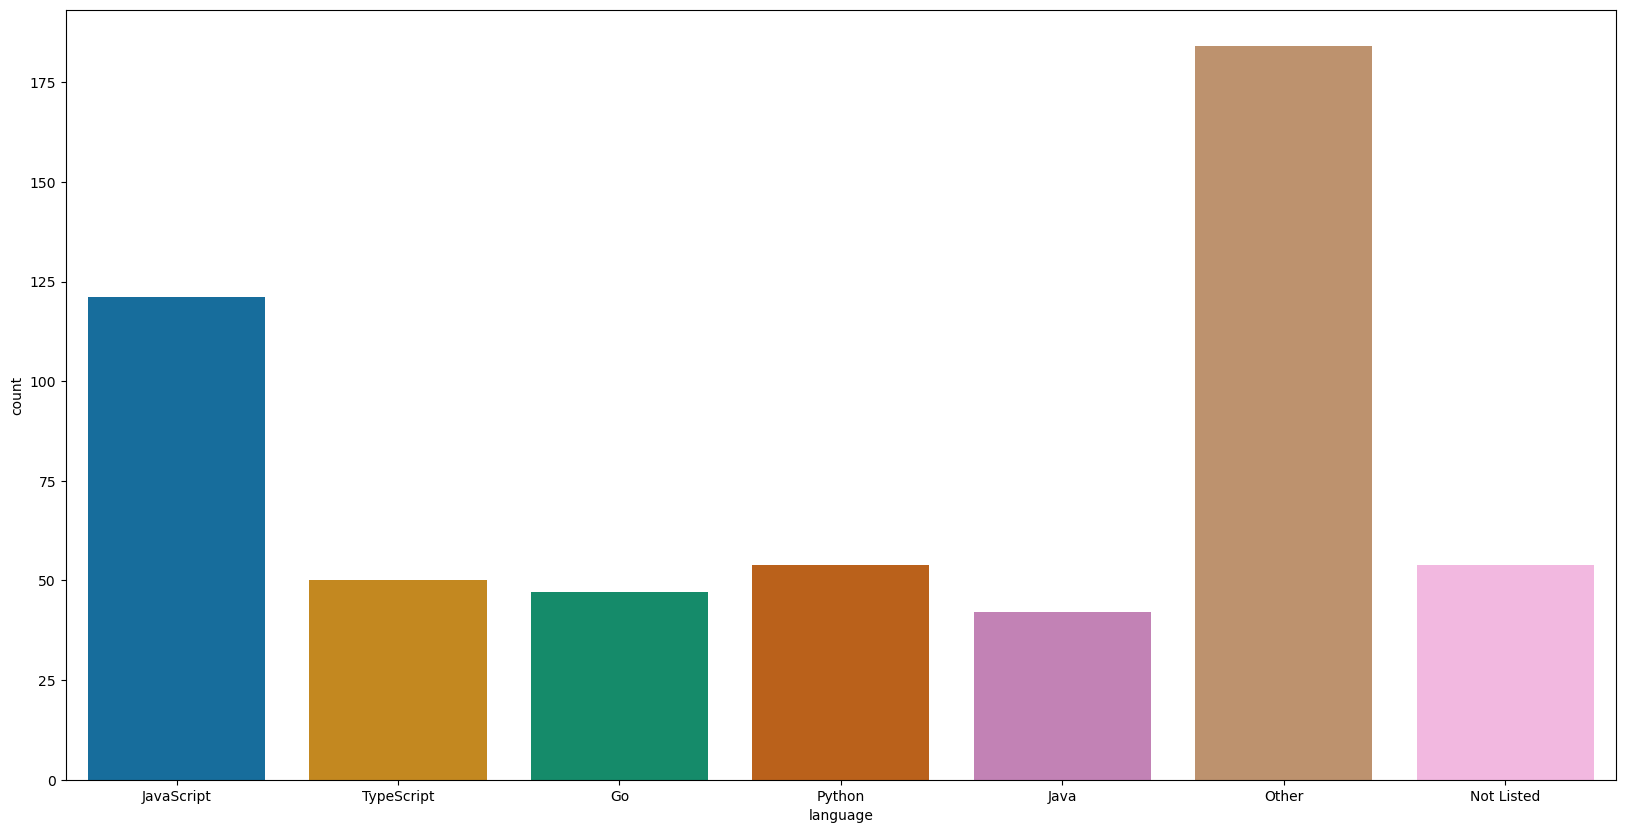

In [7]:
# Distribution of READMEs across languages
e.language_distribution(train)

## Does the name of the programming language appearing in the README indicate the main programming language?

**Set Hypothesis**

$H_0$ = There is no relationship between each ```language``` and language name in README.

$H_a$ = There is a relationship between each ```language``` and language name in README.

### JavaScript?

In [8]:
# χ^2 test for appearance of word 'javascript' in JavaScript READMEs
e.language_name_chi2(df, 'JavaScript')

Chi^2 Stat:105.95533031740635
p-value: 7.541620207758735e-25


## Because $\alpha$ > p,we  reject $H_0$

### TypeScript?

In [9]:
# χ^2 test for appearance of word 'typescript' in TypeScript READMEs
e.language_name_chi2(df, 'TypeScript')

Chi^2 Stat:40.80903884903238
p-value: 1.678549103455844e-10


## Because $\alpha$ > p,we  reject $H_0$

### Go?

In [10]:
# χ^2 test for appearance of word 'go' in Go READMEs
e.language_name_chi2(df, 'Go')

Chi^2 Stat:19.07224577295049
p-value: 1.2586201416644357e-05


## Because $\alpha$ > p,we  reject $H_0$

### Python?

In [11]:
# χ^2 test for appearance of word 'python' in Python READMEs
e.language_name_chi2(df, 'Python')

Chi^2 Stat:156.5374960393798
p-value: 6.459725929476735e-36


## Because $\alpha$ > p,we  reject $H_0$

### Java?

In [12]:
# χ^2 test for appearance of word 'java' in Java READMEs
e.language_name_chi2(df, 'Java')

Chi^2 Stat:32.51348822639151
p-value: 1.1836814715205007e-08


## Because $\alpha$ > p,we  reject $H_0$

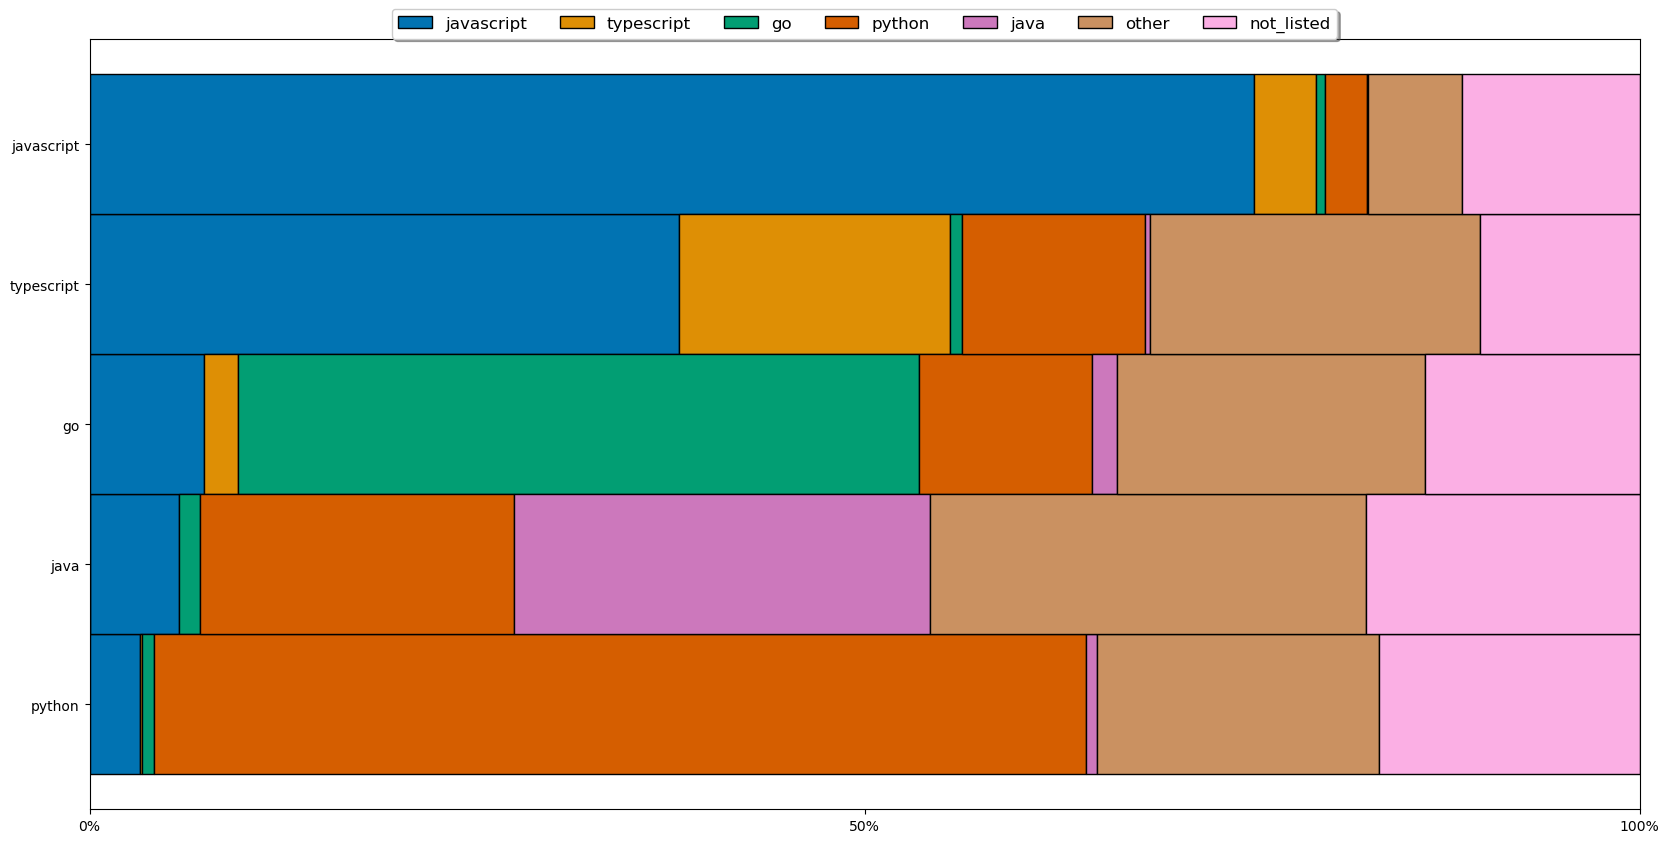

In [13]:
# Show the percentage of each word's appearance in the READMEs
e.language_name_percentage_plot(train)

## Does the frequency of a certain word within a README indicate the main programming language?

In [14]:
# Print the idf_values.describe()
e.get_idf(train)

count    54235.000000
mean         6.299948
std          0.682617
min          1.328906
25%          6.216746
50%          6.622211
75%          6.622211
max          6.622211
dtype: float64

## Does the length of the README indicate the main programming language?

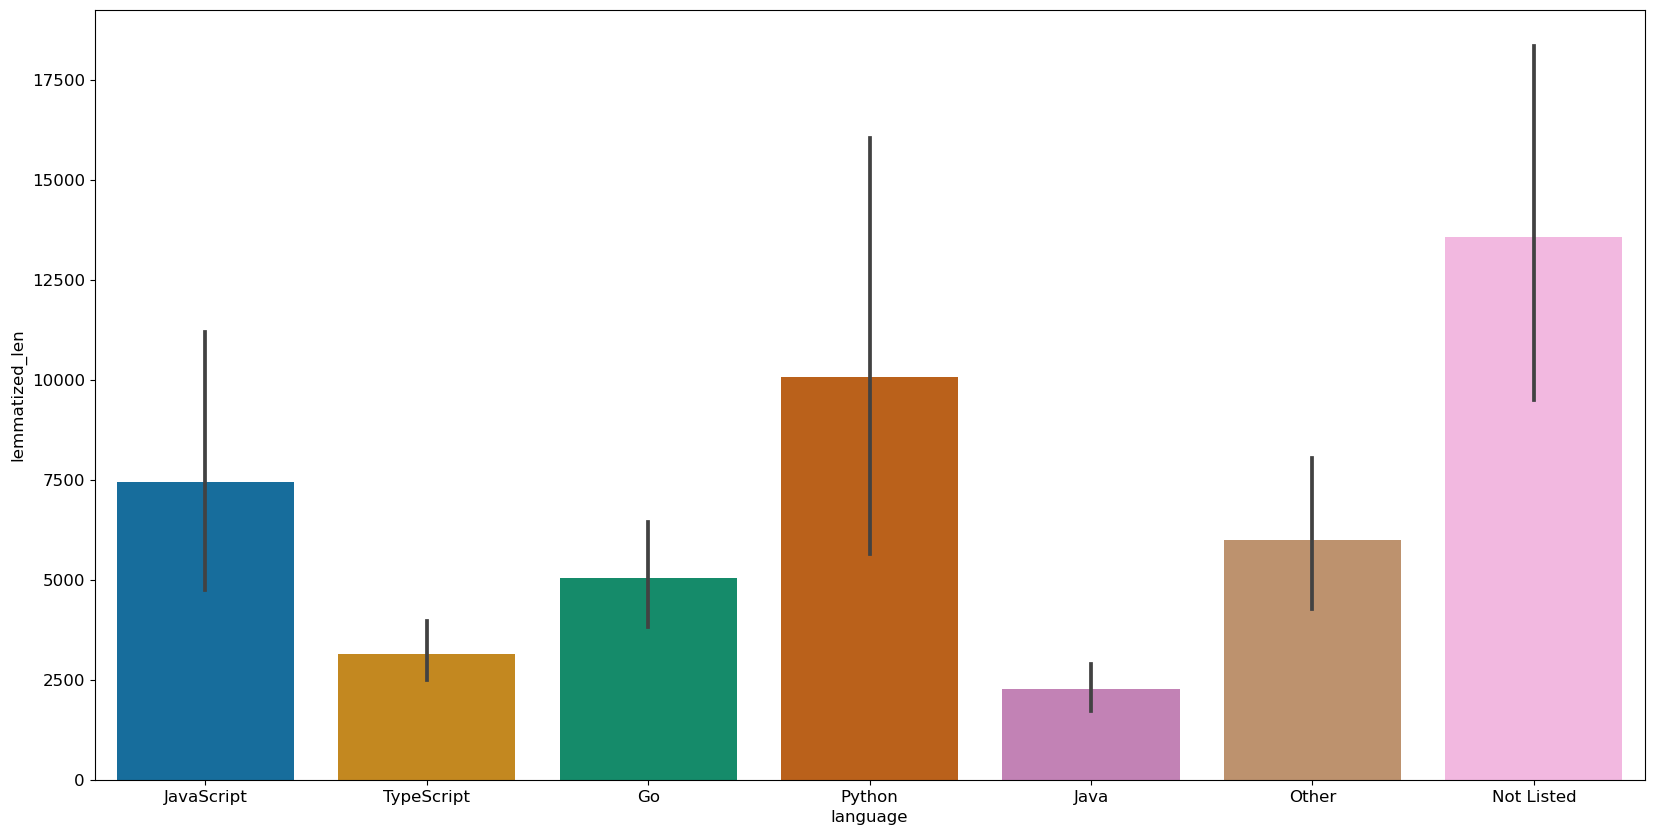

In [15]:
# Show the length of each README by programming language
e.readme_len_plot(train)

In [16]:
# Kruscal test for length of README
e.readme_len_kruskal(train)

## Because $\alpha$ > p,we  reject $H_0$

## Does a certain word appearing in the repo title indicate the main programming language?

In [17]:
e.percentage_of_language_per_word(train)

,all,javascript,typescript,go,python,java,other,not_listed
awesome,21,2,0,0,0,0,4,15
go,5,0,0,4,0,0,1,0
react,17,10,4,0,0,0,1,2


**Set Hypothesis**

$H_0$ = There is no relationship between each ```language``` and words in repo title.

$H_a$ = There is a relationship between each ```language``` and words in repo title.

In [18]:
# χ^2 test for the word "awesome" and programming language
e.title_chi2(df, 'awesome')

Chi^2 Stat:125.35688165627867
p-value: 1.2194414411723855e-24


## Because $\alpha$ > p,we  reject $H_0$

In [19]:
# χ^2 test for the word "react" and programming language
e.title_chi2(df, 'react')

Chi^2 Stat:52.15922250305225
p-value: 1.7322694143599908e-09


## Because $\alpha$ > p,we  reject $H_0$

In [20]:
# χ^2 test for the word "go" and programming language
e.title_chi2(df, 'go')

Chi^2 Stat:71.60083123448669
p-value: 1.9189915652341564e-13


## Because $\alpha$ > p,we  reject $H_0$

# Exploration Summary

* The name of the language appearing in the README of that languge shows significance.
* The length of the README appears to be an indicator of a README's primary language
* The words 'awesome','react', and 'go' appear to be indicators of a README's primary language

# Features I am moving to modeling With
| Feature | Reason | 
|:--------|:-----------|
|**lemmatized_len**| $t-test$ results|
|**language name in readme**| $chi^2$ test results|
|**repo title words('awesome','react','go')**| $chi^2$ test results|


# Features I'm not moving to modeling with
| Feature | Reason | 
|:--------|:-----------|
|**repo title**| Using appearance of certain words so don't need the full title|
|**username**| Didn't find any significance between username and main programming language|
|**README content**|  Using appearance of certain words so don't need the full content|
|**idf**| We need more research on how to use this more|

# Modeling

In [21]:
train_x, train_y, valid_x, valid_y,test_x,test_y = m.get_features_and_target(train, validate, test)

In [22]:
#baseline based on the percentage of the mode
baseline = train_y.value_counts(normalize=True).max()
#print results
print(f'Baseline accuracy: {baseline:.2%}')

Baseline accuracy: 33.33%


## Results of Models on Train and Validate
- Use decision tree, random forest, and XGBoost algorithms

In [23]:
# create models
xg_boost,random_forest,decision_tree = m.create_models()

In [24]:
# compare models on train and validate
m.compare_models(train_x, train_y, valid_x, valid_y, decision_tree, random_forest, xg_boost)

,Decision Tree,Random Forest,Gradient Boosting
Train,0.956522,0.755435,0.989130
Validate,0.435294,0.482353,0.488235


## Best Model on Test
- XGBoost had the best results on Train and validate so we ran that model on our test data.

<Figure size 640x480 with 0 Axes>

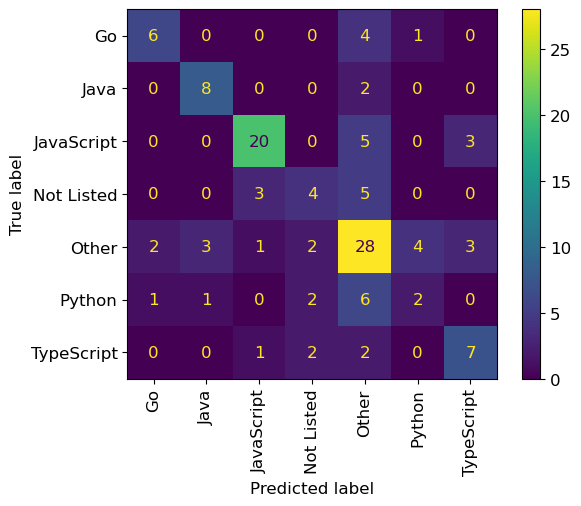

In [25]:
m.run_test(test_x,test_y,xg_boost)

### Modeling Summary

* All our models beat the baseline on train and validate
* XGBoost did the best on validate so we ran it on test
* On test it performed with XX% accuracy beating baseline by **XX%**

# Conclusions

### Exploration

* The name of the language appearing in the README of that languge shows significance.
* The length of the README seems to be an indicator of a README's primary language
* The words 'awesome','react', and 'go' appearing in the repo title seem to be indicators of a README's primary language

### Modeling

* All our models beat the baseline on train and validate
* XGBoost did the best on validate so we ran it on test
* On test it performed with XX% accuracy beating baseline by **XX%**

### Recommendations

* We suggest to use this model to predict primary programming language for now.
* Collect more READMEs for exploration and discovery of indicators of primary programming language 

### Next Steps
* In the next iteration:
    * Collect more READMEs to help improve what we base our model on.
    * Continue exploration of tf and idf as features to improve our model.